In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import t
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
drafted = pd.read_csv('drafted_2006.csv')
undrafted = pd.read_csv('undrafted_2006.csv')
draft_df = pd.read_csv('career_df_2006.csv')

In [3]:
drafted.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,CarAV,DrAV,Solo,Int,Sacks,Drafted,Solos_Per_Year,Ints_Per_Year,Sacks_Per_Year,Solos_Per_Game
0,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.000000,30.5,103.0,...,0.0,NaN,1.0,0.0,0.0,D,0.33,0.00,0.00,0.020625
1,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.000000,32.0,112.0,...,13.0,13.0,109.0,0.0,3.0,D,36.33,0.00,1.00,2.270625
2,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.000000,39.5,131.0,...,13.0,9.0,213.0,15.0,0.0,D,35.50,2.50,0.00,2.218750
3,2006.0,Jon Alston,Stanford,OLB,72.75,223.0,4.53,30.000000,40.0,132.0,...,6.0,0.0,51.0,0.0,0.0,D,17.00,0.00,0.00,1.062500
4,2006.0,James Anderson,Virginia Tech,OLB,74.75,229.0,4.62,21.839506,41.0,121.0,...,31.0,25.0,421.0,3.0,12.0,D,46.78,0.33,1.33,2.923750


In [4]:
undrafted.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,5.08,22.0,27.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,4.74,NaN,38.5,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
2,2006.0,Sir Henry Anderson,Oregon State,DT,75.88,306.0,5.23,27.0,28.5,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,2006.0,Eric Bassey,Oklahoma,CB,71.88,195.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
4,2006.0,Brett Bell,Wisconsin,CB,72.25,190.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


In [5]:
draft_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,5.08,22.0,27.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.0,30.5,103.0,...,2009.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,D
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,4.74,NaN,38.5,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.0,32.0,112.0,...,2009.0,0.0,0.0,2.0,13.0,13.0,109.0,NaN,3.0,D
4,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.0,39.5,131.0,...,2012.0,0.0,0.0,1.0,13.0,9.0,213.0,15.0,NaN,D


In [14]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             168 non-null    float64
 1   Name             168 non-null    object 
 2   College          168 non-null    object 
 3   POS              168 non-null    object 
 4   Height (in)      168 non-null    float64
 5   Weight (lbs)     168 non-null    float64
 6   40 Yard          168 non-null    float64
 7   Bench Press      168 non-null    float64
 8   Vert Leap (in)   168 non-null    float64
 9   Broad Jump (in)  168 non-null    float64
 10  Shuttle          168 non-null    float64
 11  3Cone            168 non-null    float64
 12  Win-Loss Record  155 non-null    object 
 13  Round            108 non-null    float64
 14  Pick             108 non-null    float64
 15  Team             108 non-null    object 
 16  Age              101 non-null    float64
 17  To              

In [15]:
draft_df['Broad Jump (in)'].replace(np.nan, np.mean(draft_df['Broad Jump (in)']), inplace=True)
draft_df['Bench Press'].replace(np.nan, np.mean(draft_df['Bench Press']), inplace=True)
draft_df['40 Yard'].replace(np.nan, np.mean(draft_df['40 Yard']), inplace=True)
draft_df['Vert Leap (in)'].replace(np.nan, np.mean(draft_df['Vert Leap (in)']), inplace=True)
draft_df['Shuttle'].replace(np.nan, np.mean(draft_df['Shuttle']), inplace=True)
draft_df['3Cone'].replace(np.nan, np.mean(draft_df['3Cone']), inplace=True)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = draft_df['Drafted']
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size=0.25, random_state=123)

X_scaled = preprocessing.scale(Xlr)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_scaled, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.6666666666666666


In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [38]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

KeyError: "None of [Int64Index([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,\n             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,\n             52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,\n             65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,\n             78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,\n             91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,\n            104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,\n            117, 118, 119, 120, 121, 122, 123, 124, 125],\n           dtype='int64')] are in the [columns]"

# Desicion Tree

In [52]:
draft_df.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)',
       'Shuttle', '3Cone', 'Win-Loss Record', 'Round', 'Pick', 'Team', 'Age',
       'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'Solo', 'Int', 'Sacks',
       'Drafted'],
      dtype='object')

In [53]:
y = draft_df.Drafted
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [56]:
draft_dt1 = tree.DecisionTreeClassifier(criterion='entropy')

draft_dt1.fit(X_train, y_train)

y_pred = draft_dt1.predict(X_test)

y_pred = pd.Series(y_pred)

draft_dt1

DecisionTreeClassifier(criterion='entropy')

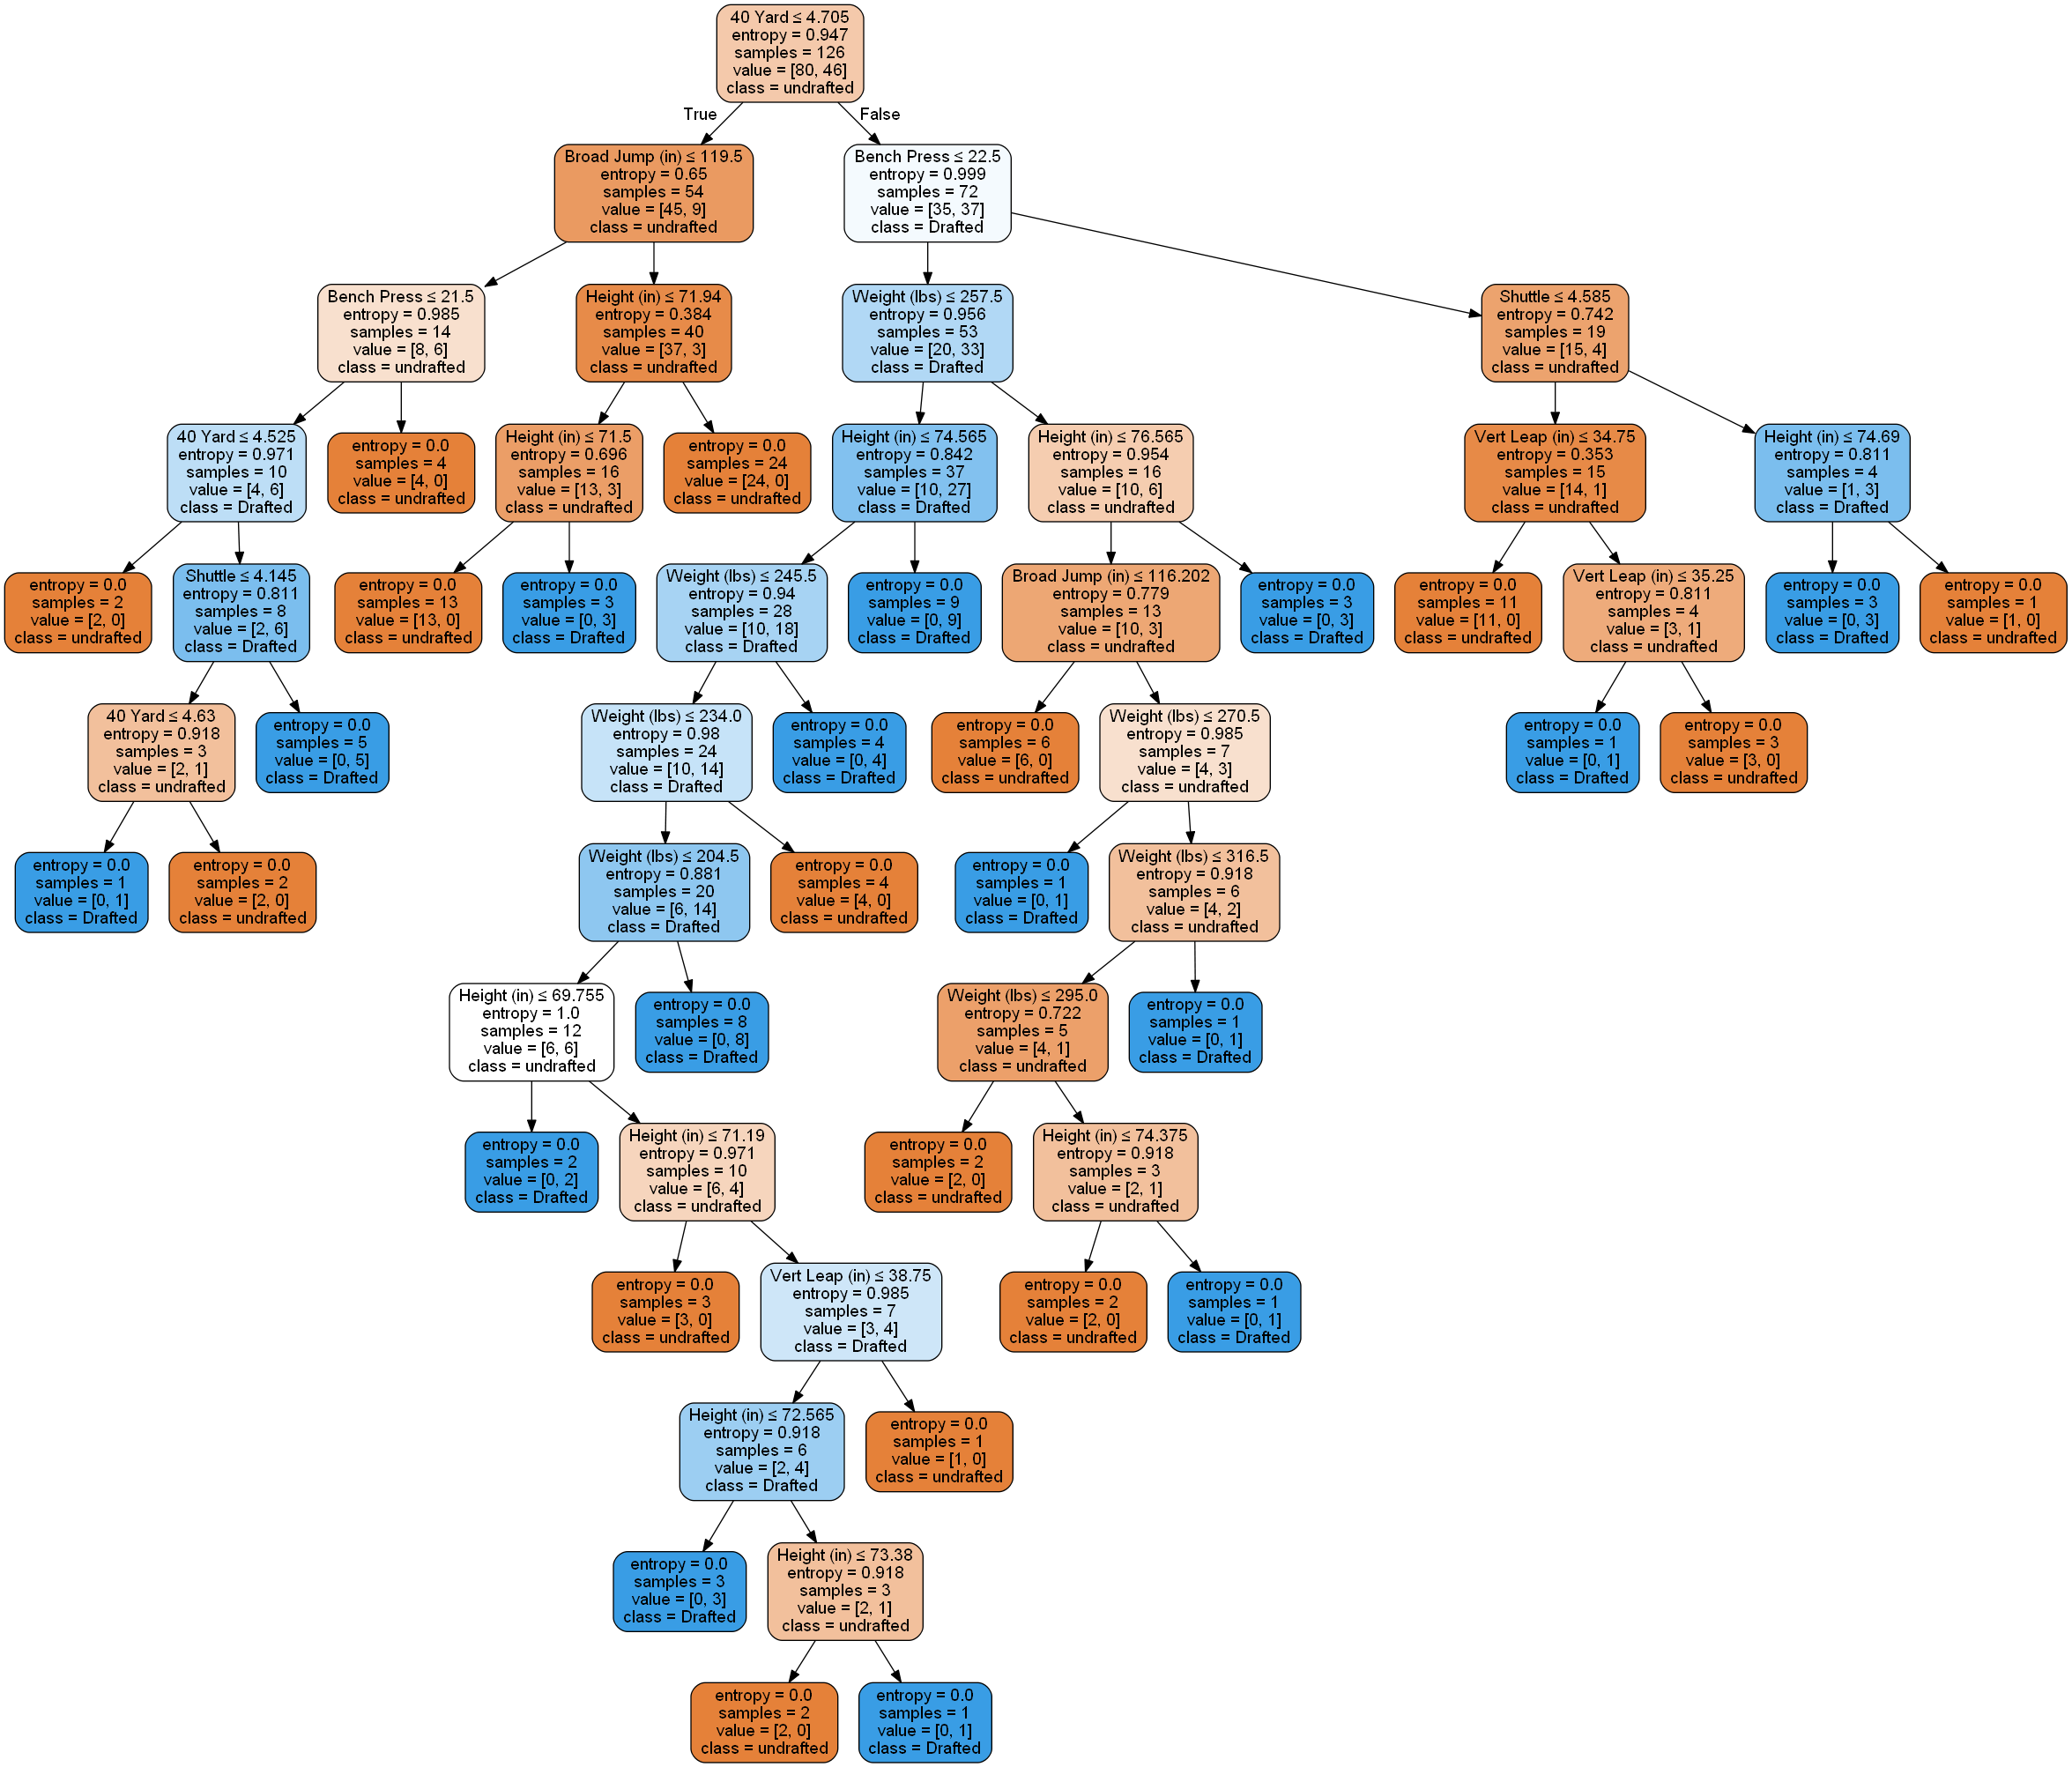

In [63]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_dt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [62]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "U"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "D"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Model Entropy - no max depth
Accuracy: 0.6904761904761905
Balanced accuracy: 0.6428571428571428
Precision score for "Yes" 0.7586206896551724
Precision score for "No" 0.5384615384615384
Recall score for "Yes" 0.7857142857142857
Recall score for "No" 0.5


In [65]:
draft_gini = tree.DecisionTreeClassifier(criterion='gini')

draft_gini.fit(X_train, y_train)

y_pred = draft_gini.predict(X_test)

y_pred = pd.Series(y_pred)

draft_gini

DecisionTreeClassifier()

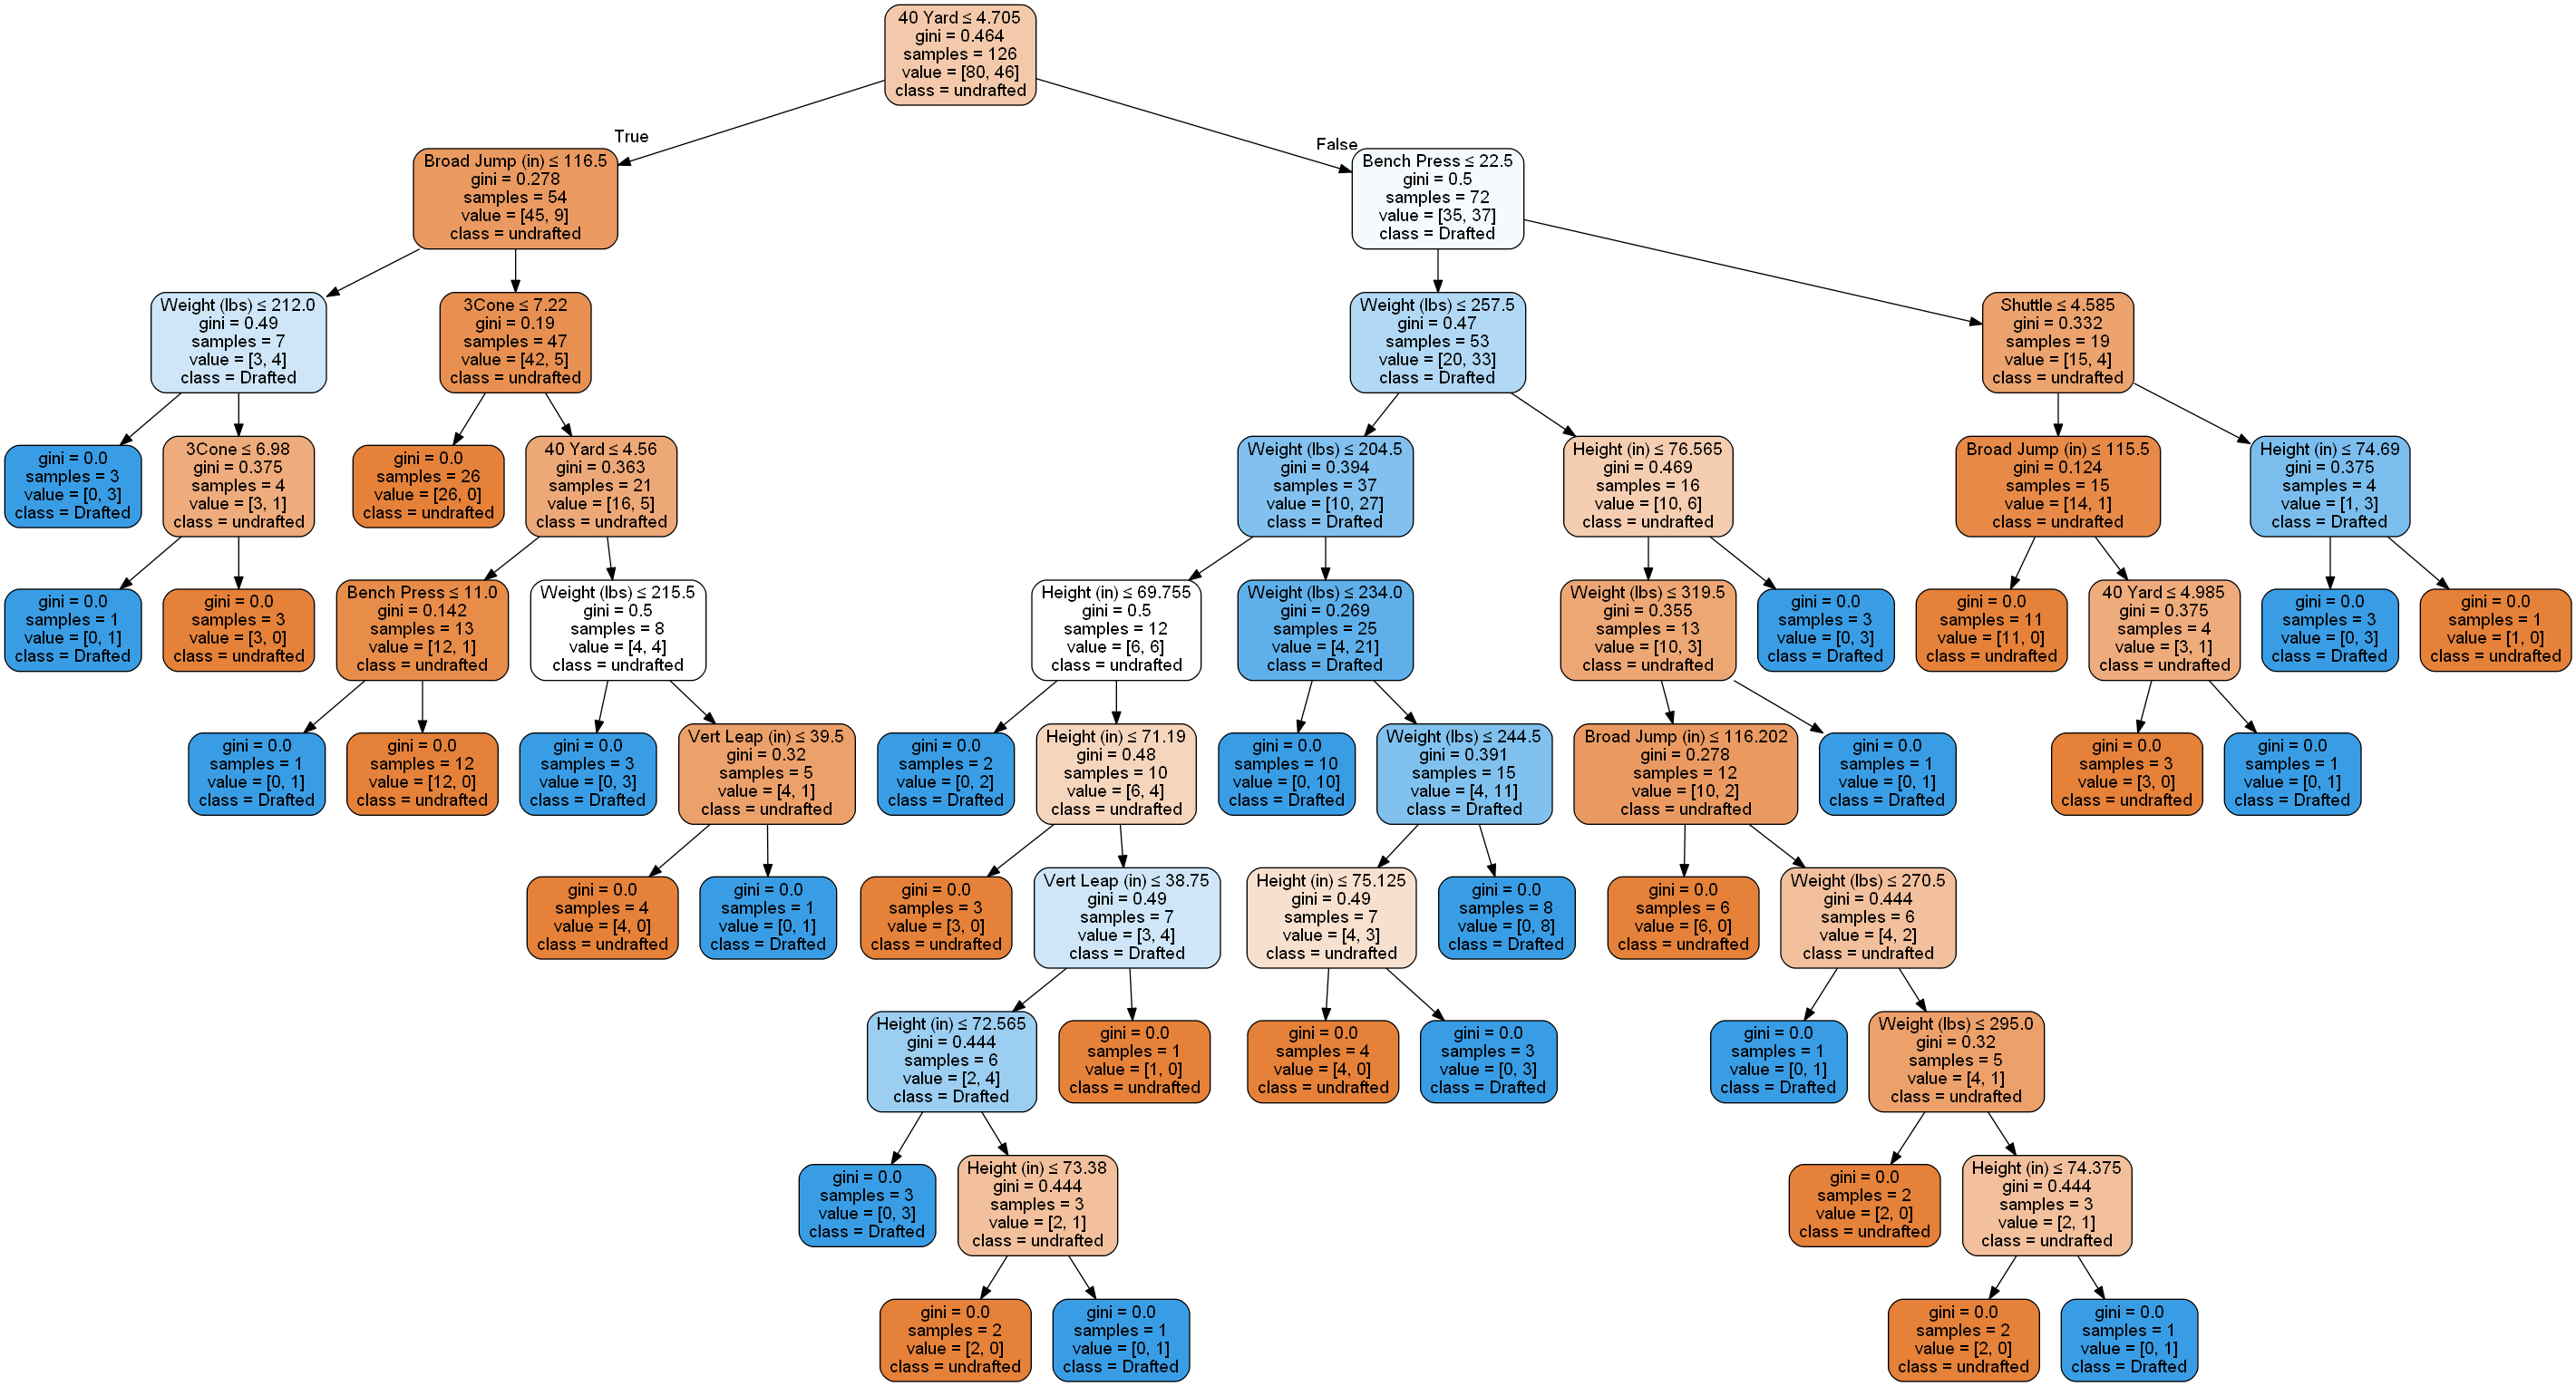

In [66]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [67]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Model Gini impurity model
Accuracy: 0.6666666666666666
Balanced accuracy: 0.625
Precision score 0.75
Recall score 0.5


In [100]:
draft_dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

draft_dt2.fit(X_train, y_train)

y_pred = draft_dt2.predict(X_test)

y_pred = pd.Series(y_pred)

draft_dt2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

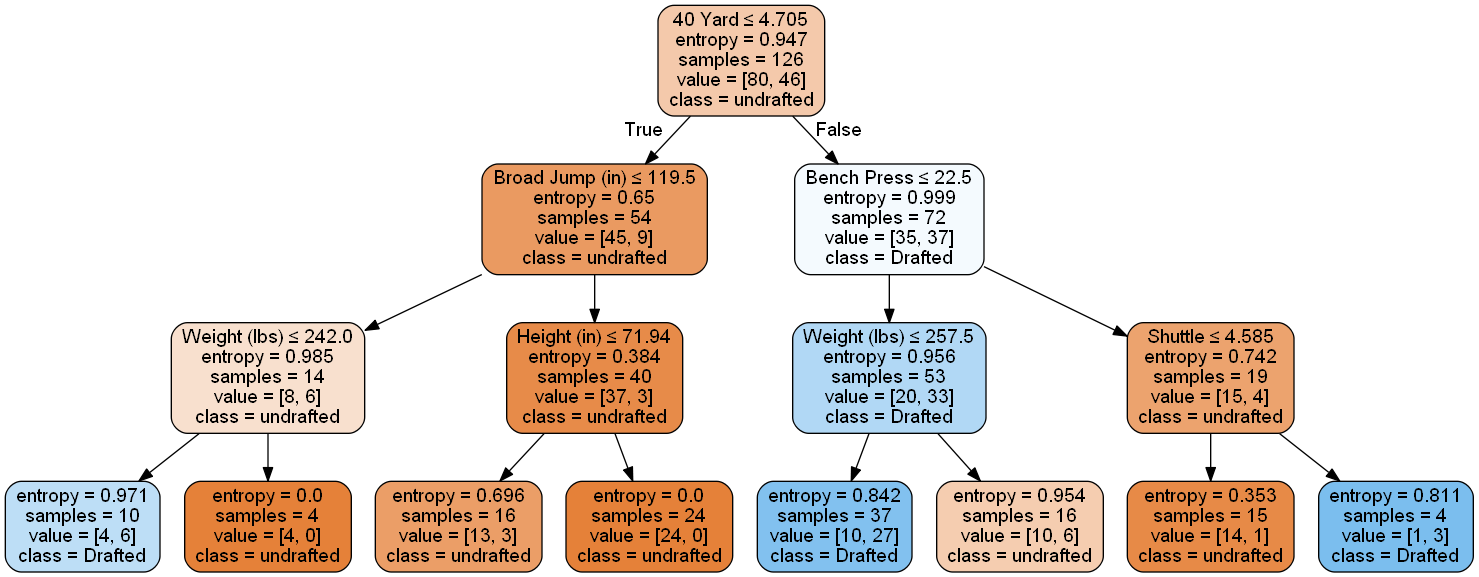

In [101]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_dt2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [102]:
# Run this block for model evaluation
print("Model Entropy max_depth = 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Model Entropy max_depth = 3
Accuracy: 0.7380952380952381
Balanced accuracy: 0.7142857142857143
Precision score 0.8148148148148148
Recall score 0.6428571428571429


In [82]:
draft_gini2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

draft_gini2.fit(X_train, y_train)

y_pred = draft_gini2.predict(X_test)

y_pred = pd.Series(y_pred)

draft_gini2

DecisionTreeClassifier(max_depth=3)

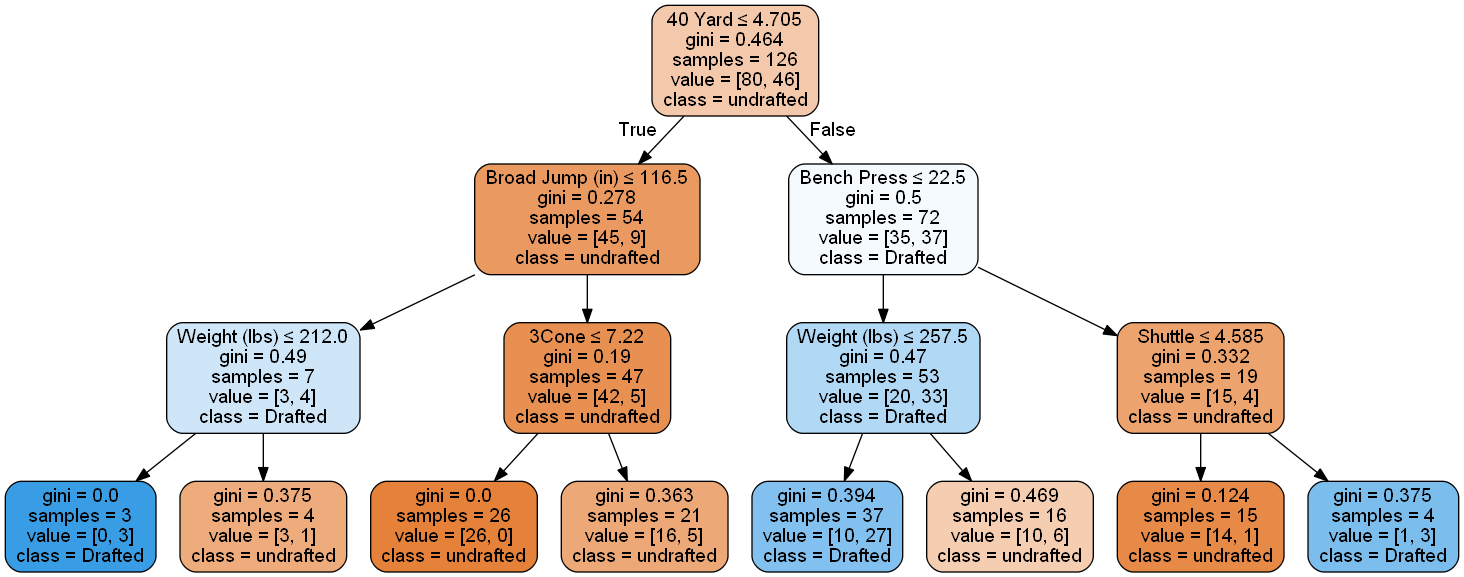

In [83]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_gini2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [84]:
# Run this block for model evaluation
print("Model Entropy max_depth = 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Model Entropy max_depth = 3
Accuracy: 0.7142857142857143
Balanced accuracy: 0.6785714285714286
Precision score 0.7857142857142857
Recall score 0.5714285714285714


# Random Forest

In [98]:
draft_rf1 = RandomForestClassifier(max_depth=5, random_state=123)

draft_rf1.fit(X_train, y_train)

y_pred = draft_rf1.predict(X_test)

y_pred = pd.Series(y_pred)

draft_rf1

RandomForestClassifier(max_depth=5, random_state=123)

In [99]:
print("Random Forest Model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Random Forest Model - max depth 3
Accuracy: 0.7142857142857143
Balanced accuracy: 0.6785714285714286
Precision score 0.7857142857142857
Recall score 0.5714285714285714
